<!--NAVIGATION-->
<!--NAVIGATION-->
<!-- markdownlint-disable -->
<h2 align="center" style="font-family:verdana;font-size:150%"> <b>S</b>equencing <b>A</b>nalysis and <b>D</b>ata Library for <b>I</b>mmunoinformatics <b>E</b>xploration <br><br>Demonstration for AIRR-C 2022</h2>
<div align="center">
  <img src="https://sadiestaticcrm.s3.us-west-2.amazonaws.com/Sadie.svg" alt="SADIE" style="margin:0.2em;width:50%">
</div>
<br>

<a href="https://colab.research.google.com/github/jwillis0720/sadie/blob/airr_c/notebooks/airr_c/SADIE_DEMO.ipynb"><img align="center" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Setup

Here we will setup our files for the demo. If you are running the notebook locally, these files don't need to be pulled from the repository

In [61]:
%load_ext lab_black


def install_packages() -> None:
    !pip -q install git+https://github.com/jwillis0720/sadie.git@6fe0ebf5c906cb0f94a817b74113929d09d88eeb
    !pip -q install seaborn matplotlib


def get_demo_files() -> None:
    """Get the demonstration files for AIRR-C 2022"""
    !wget -q -O input.tgz https://github.com/jwillis0720/sadie/raw/airr_c/notebooks/airr_c/input.tgz
    !tar -xf input.tgz


import sys

if "google.colab" in sys.modules:
    install_packages()
    get_demo_files()

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


# Low Level

First, let's start at a very low level. These are pythonic objects that model the data we expect in an AIRR compliant data format. They are divided by [AIRR 1.3 Rearragment category](https://docs.airr-community.org/en/stable/datarep/rearrangements.html)

* Input Sequence
* Primay Annotations
* Alignment Annotations
* Alignment Positions
* RegionSequences
* RegionPositions


All of these are combined as a `Receptor Chain` Object. 

Now let's take a look how a person interested in low level programming could use these objects

## Input Sequence

In [88]:
from sadie.receptor.rearrangment import InputSequence
from Bio import SeqIO
from pprint import pprint

vrc01_heavy_sequecne = SeqIO.read("input/vrc01_heavy.fasta", "fasta")

# make an input sequence model
input_sequence_model = InputSequence(
    sequence_id=vrc01_heavy_sequecne.name,
    sequence=vrc01_heavy_sequecne.seq,
    raw_sequence=vrc01_heavy_sequecne.seq,
)

# Print out dictionary to see
pprint(input_sequence_model.__dict__)

{'category': RearrargmentCategory(category='input'),
 'raw_sequence': Seq('CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATG...GGG'),
 'sequence': Seq('CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATG...GGG'),
 'sequence_aa': None,
 'sequence_id': 'VRC01_heavy'}


## Primary Annotations

In [89]:
from sadie.receptor.rearrangment import PrimaryAnnotations

# make a primary sequence model
primary_sequence_annotation_model = PrimaryAnnotations(
    rev_comp=False,
    productive=True,
    vj_in_frame=True,
    stop_codon=False,
    complete_vdj=True,
    locus="IGH",
    v_call="IGHV1-2*02",
    d_call=["IGHD3-16*01", "IGHD3-16*02"],
    j_call="IGHJ1*01",
    v_call_top="IGHV1-2*02",
    d_call_top="IGHD3-16*01",
    j_call_top="IGHJ1*01",
    c_call="IGHG1*01",
)
pprint(primary_sequence_annotation_model.__dict__)

{'c_call': 'IGHG1*01',
 'c_call_allele': None,
 'category': RearrargmentCategory(category='primary_annotations'),
 'complete_vdj': True,
 'd2_call': None,
 'd_call': ['IGHD3-16*01', 'IGHD3-16*02'],
 'd_call_allele': None,
 'd_call_gene': None,
 'd_call_top': 'IGHD3-16*01',
 'j_call': 'IGHJ1*01',
 'j_call_top': 'IGHJ1*01',
 'j_call_top_allele': None,
 'j_call_top_gene': None,
 'locus': 'IGH',
 'productive': True,
 'rev_comp': False,
 'species': None,
 'stop_codon': False,
 'v_call': 'IGHV1-2*02',
 'v_call_top': 'IGHV1-2*02',
 'v_call_top_allele': None,
 'v_call_top_gene': None,
 'vj_in_frame': True}


## Alignment Annotations

In [90]:
from sadie.receptor.rearrangment import AlignmentAnnotations

# Model 3 - Alignment Annotations
alignment_annotations_model = AlignmentAnnotations(
    sequence_alignment="CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATGAGAATTTCTTGTCGGGCTTCTGGATATGAATTTATTGATTGTACGCTAAATTGGATTCGTCTGGCCCCCGGAAAAAGGCCTGAGTGGATGGGATGGCTGAAGCCTCGGGGGGGGGCCGTCAACTACGCACGTCCACTTCAGGGCAGAGTGACCATGACTCGAGACGTTTATTCCGACACAGCCTTTTTGGAGCTGCGCTCGTTGACAGTAGACGACACGGCCGTCTACTTTTGTACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACACTGGGGCCGGGGCACCCCGGTCATCGTCTCATCAG",
    sequence_alignment_aa="QVQLVQSGGQMKKPGESMRISCRASGYEFIDCTLNWIRLAPGKRPEWMGWLKPRGGAVNYARPLQGRVTMTRDVYSDTAFLELRSLTVDDTAVYFCTRGKNCDYNWDFEHWGRGTPVIVSS",
    germline_alignment="CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGATACACCTTCACCGGCTACTATATGCACTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAACCCTAACAGTGGTGGCACAAACTATGCACAGAAGTTTCAGGGCAGGGTCACCATGACCAGGGACACGTCCATCAGCACAGCCTACATGGAGCTGAGCAGGCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGNNNNNNNNNNNNTGATTACGTTTGGGACTTCCAGCACTGGGGCCAGGGCACCCTGGTCACCGTCTCCTCAG",
    germline_alignment_aa="QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSISTAYMELSRLRSDDTAVYYCAXXXXXDYVWDFQHWGQGTLVTVSS",
    v_score=168.2,
    d_score=17.8,
    j_score=52.6,
    v_identity=0.6825,
    d_identity=0.85,
    j_identity=0.86,
    v_cigar="6S293M76S3N",
    d_cigar="311S6N14M50S17N",
    j_cigar="325S7N45M5S",
    v_support=6.796e-44,
    d_support=0.5755,
    j_support=5.727e-11,
    junction="TGTACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACACTGG",
    junction_aa="CTRGKNCDYNWDFEHW",
    np1="GGGAAAAAACTG",
    c_score=100,
    c_identity=1,
    c_support=1e-44,
    c_cigar="6S293M76S3N",
)
# alignment_sequence_annotation_model = AlignmentAnnotations(**alignment_dict)
pprint(alignment_annotations_model.__dict__)

{'c_cigar': '6S293M76S3N',
 'c_identity': 1.0,
 'c_score': 100.0,
 'c_support': 1e-44,
 'category': RearrargmentCategory(category='alignment_annotations'),
 'd2_cigar': None,
 'd2_identity': None,
 'd2_score': None,
 'd2_support': None,
 'd_cigar': '311S6N14M50S17N',
 'd_identity': 0.85,
 'd_score': 17.8,
 'd_support': 0.5755,
 'germline_alignment': 'CAGGTGCAGCTGGTGCAGTCTGGGGCTGAGGTGAAGAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGATACACCTTCACCGGCTACTATATGCACTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAACCCTAACAGTGGTGGCACAAACTATGCACAGAAGTTTCAGGGCAGGGTCACCATGACCAGGGACACGTCCATCAGCACAGCCTACATGGAGCTGAGCAGGCTGAGATCTGACGACACGGCCGTGTATTACTGTGCGAGNNNNNNNNNNNNTGATTACGTTTGGGACTTCCAGCACTGGGGCCAGGGCACCCTGGTCACCGTCTCCTCAG',
 'germline_alignment_aa': 'QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLEWMGWINPNSGGTNYAQKFQGRVTMTRDTSISTAYMELSRLRSDDTAVYYCAXXXXXDYVWDFQHWGQGTLVTVSS',
 'j_cigar': '325S7N45M5S',
 'j_identity': 0.86,
 'j_score': 52.6,
 'j_support': 5.727e-11,
 'junction': 'TGTACTAGGGGAAAAAACTGTGAT

# Optional but recommended models

## AlignmentPositions

In [91]:
from sadie.receptor.rearrangment import AlignmentPositions

alignment_positions_dict = dict(
    v_sequence_start=7,
    v_sequence_end=299,
    v_germline_start=1,
    v_germline_end=293,
    v_alignment_start=1,
    v_alignment_end=293,
    d_sequence_start=312,
    d_sequence_end=325,
    d_germline_start=7,
    d_germline_end=20,
    d_alignment_start=306,
    d_alignment_end=319,
    j_sequence_start=326,
    j_sequence_end=370,
    j_germline_start=8,
    j_germline_end=52,
    j_alignment_start=320,
    j_alignment_end=364,
)
alignment_positions_model = AlignmentPositions(**alignment_positions_dict)
pprint(alignment_positions_model.__dict__)

{'category': RearrargmentCategory(category='alignment_positions'),
 'd2_alignment_end': None,
 'd2_alignment_start': None,
 'd2_germline_end': None,
 'd2_germline_start': None,
 'd2_sequence_end': None,
 'd2_sequence_start': None,
 'd_alignment_end': 319,
 'd_alignment_start': 306,
 'd_germline_end': 20,
 'd_germline_start': 7,
 'd_sequence_end': 325,
 'd_sequence_start': 312,
 'j_alignment_end': 364,
 'j_alignment_start': 320,
 'j_germline_end': 52,
 'j_germline_start': 8,
 'j_sequence_end': 370,
 'j_sequence_start': 326,
 'v_alignment_end': 293,
 'v_alignment_start': 1,
 'v_germline_end': 293,
 'v_germline_start': 1,
 'v_sequence_end': 299,
 'v_sequence_start': 7}


## RegionSequences

In [92]:
from sadie.receptor.rearrangment import RegionSequences

region_sequence_dict = dict(
    fwr="CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATGAGAATTTCTTGTCGGGCTTCT",
    fwr1_aa="QVQLVQSGGQMKKPGESMRISCRAS",
    cdr1="GGATATGAATTTATTGATTGTACG",
    cdr1_aa="GYEFIDCT",
    fwr2="CTAAATTGGATTCGTCTGGCCCCCGGAAAAAGGCCTGAGTGGATGGGATGG",
    fwr2_aa="LNWIRLAPGKRPEWMGW",
    cdr2="CTGAAGCCTCGGGGGGGGGCCGTC",
    cdr2_aa="LKPRGGAV",
    fwr3="AACTACGCACGTCCACTTCAGGGCAGAGTGACCATGACTCGAGACGTTTATTCCGACACAGCCTTTTTGGAGCTGCGCTCGTTGACAGTAGACGACACGGCCGTCTACTTTTGT",
    fwr3_aa="NYARPLQGRVTMTRDVYSDTAFLELRSLTVDDTAVYFC",
    cdr3="ACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACAC",
    cdr3_aa="TRGKNCDYNWDFEH",
    fwr4="TGGGGCCGGGGCACCCCGGTCATCGTCTCATCA",
    fwr4_aa="WGRGTPVIVSS",
)
region_sequence_model = RegionSequences(**region_sequence_dict)
pprint(region_sequence_model.__dict__)

{'category': RearrargmentCategory(category='region_sequence_annotations'),
 'cdr1': 'GGATATGAATTTATTGATTGTACG',
 'cdr1_aa': 'GYEFIDCT',
 'cdr2': 'CTGAAGCCTCGGGGGGGGGCCGTC',
 'cdr2_aa': 'LKPRGGAV',
 'cdr3': 'ACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACAC',
 'cdr3_aa': 'TRGKNCDYNWDFEH',
 'fwr1': None,
 'fwr1_aa': 'QVQLVQSGGQMKKPGESMRISCRAS',
 'fwr2': 'CTAAATTGGATTCGTCTGGCCCCCGGAAAAAGGCCTGAGTGGATGGGATGG',
 'fwr2_aa': 'LNWIRLAPGKRPEWMGW',
 'fwr3': 'AACTACGCACGTCCACTTCAGGGCAGAGTGACCATGACTCGAGACGTTTATTCCGACACAGCCTTTTTGGAGCTGCGCTCGTTGACAGTAGACGACACGGCCGTCTACTTTTGT',
 'fwr3_aa': 'NYARPLQGRVTMTRDVYSDTAFLELRSLTVDDTAVYFC',
 'fwr4': 'TGGGGCCGGGGCACCCCGGTCATCGTCTCATCA',
 'fwr4_aa': 'WGRGTPVIVSS'}


In [93]:
from sadie.receptor.rearrangment import RegionPositions

region_positions_dict = dict(
    fwr1_start=7,
    fwr1_end=81,
    cdr1_start=82,
    cdr1_end=105,
    fwr2_start=106,
    fwr2_end=156,
    cdr2_start=157,
    cdr2_end=180,
    fwr3_start=181,
    fwr3_end=294,
    cdr3_start=295,
    cdr3_end=336,
    fwr4_start=337,
    fwr4_end=369,
)
region_position_model = RegionPositions(**region_positions_dict)
pprint(region_position_model.__dict__)

{'category': RearrargmentCategory(category='region_positions'),
 'cdr1_end': 105,
 'cdr1_start': 82,
 'cdr2_end': 180,
 'cdr2_start': 157,
 'cdr3_end': 336,
 'cdr3_start': 295,
 'fwr1_end': 81,
 'fwr1_start': 7,
 'fwr2_end': 156,
 'fwr2_start': 106,
 'fwr3_end': 294,
 'fwr3_start': 181,
 'fwr4_end': 369,
 'fwr4_start': 337}


# Junction Lengths

In [94]:
from sadie.receptor.rearrangment import JunctionLengths

junction_length_dict = dict(
    junction_length=48,
    junction_aa_length=None,
    np1_length=None,
    np2_length=None,
    np3_length=None,
    n1_length=None,
    n2_length=None,
    n3_length=None,
    p3v_length=None,
    p5d_length=None,
    p3d_length=None,
    p5d2_length=None,
    p3d2_length=None,
    p5j_length=None,
)
junction_length_model = JunctionLengths(**junction_length_dict)
pprint(junction_length_model.__dict__)

{'category': RearrargmentCategory(category='junction_lengths'),
 'junction_aa_length': None,
 'junction_length': 48,
 'n1_length': None,
 'n2_length': None,
 'n3_length': None,
 'np1_length': None,
 'np2_length': None,
 'np3_length': None,
 'p3d2_length': None,
 'p3d_length': None,
 'p3v_length': None,
 'p5d2_length': None,
 'p5d_length': None,
 'p5j_length': None}


## ReceptorChain

All of those annotations can now be [composed](https://www.youtube.com/watch?v=0mcP8ZpUR38) into a ReceptorChain model

In [95]:
from sadie.receptor.rearrangment import ReceptorChain

receptor_chain = ReceptorChain(
    input_sequence=input_sequence_model,
    primary_annotations=primary_sequence_annotation_model,
    alignment_annotations=alignment_annotations_model,
    alignment_positions=alignment_positions_model,
    region_sequences=region_sequence_model,
    region_positions=region_sequence_model,
    junction_lengths=junction_length_model,
)
print(receptor_chain)

input_sequence
--------------
sequence_id : VRC01_heavy
sequence : CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATGAGAATTTCTTGTCGGGCTTCTGGATATGAATTTATTGATTGTACGCTAAATTGGATTCGTCTGGCCCCCGGAAAAAGGCCTGAGTGGATGGGATGGCTGAAGCCTCGGGGGGGGGCCGTCAACTACGCACGTCCACTTCAGGGCAGAGTGACCATGACTCGAGACGTTTATTCCGACACAGCCTTTTTGGAGCTGCGCTCGTTGACAGTAGACGACACGGCCGTCTACTTTTGTACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACACTGGGGCCGGGGCACCCCGGTCATCGTCTCATCAGGGGGG
raw_sequence : CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATGAGAATTTCTTGTCGGGCTTCTGGATATGAATTTATTGATTGTACGCTAAATTGGATTCGTCTGGCCCCCGGAAAAAGGCCTGAGTGGATGGGATGGCTGAAGCCTCGGGGGGGGGCCGTCAACTACGCACGTCCACTTCAGGGCAGAGTGACCATGACTCGAGACGTTTATTCCGACACAGCCTTTTTGGAGCTGCGCTCGTTGACAGTAGACGACACGGCCGTCTACTTTTGTACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACACTGGGGCCGGGGCACCCCGGTCATCGTCTCATCAGGGGGG
sequence_aa : None
category : category='input'


primary_annotations
-------------------
rev_comp : False
productive : True
vj_in_frame : True
stop_codon : False
complete_vdj : T

# Mid-level

Okay, but maybe you don't even care about composing low level objects. You just have a sequence without the proper annotations. You can use convienience methods to quickly fill in the annotations in the model. How does it align and annotate? More on that later


In [96]:
receptor_chain = ReceptorChain.from_single("vrc01_heavy", vrc01_heavy_sequecne.seq)
# Same as before but from the `from_single` method
print(receptor_chain)

input_sequence
--------------
sequence_id : vrc01_heavy
sequence : CAGGTGCAGCTGGTGCAGTCTGGGGGTCAGATGAAGAAGCCTGGCGAGTCGATGAGAATTTCTTGTCGGGCTTCTGGATATGAATTTATTGATTGTACGCTAAATTGGATTCGTCTGGCCCCCGGAAAAAGGCCTGAGTGGATGGGATGGCTGAAGCCTCGGGGGGGGGCCGTCAACTACGCACGTCCACTTCAGGGCAGAGTGACCATGACTCGAGACGTTTATTCCGACACAGCCTTTTTGGAGCTGCGCTCGTTGACAGTAGACGACACGGCCGTCTACTTTTGTACTAGGGGAAAAAACTGTGATTACAATTGGGACTTCGAACACTGGGGCCGGGGCACCCCGGTCATCGTCTCATCAGGGGGG
raw_sequence : None
sequence_aa : None
category : category='input'


primary_annotations
-------------------
rev_comp : False
productive : True
vj_in_frame : True
stop_codon : False
complete_vdj : True
locus : IGH
v_call : IGHV1-2*02
d_call : IGHD3-16*01,IGHD3-16*02
d2_call : None
j_call : IGHJ1*01
c_call : None
v_call_top : IGHV1-2*02
v_call_top_gene : None
v_call_top_allele : None
d_call_top : IGHD3-16*01
d_call_gene : None
d_call_allele : None
j_call_top : IGHJ1*01
j_call_top_gene : None
j_call_top_allele : None
c_call_allele : None
species : human
categ

# Using the SADIE AIRR module:

SADIE AIRR will annotate sequences, verify fields, and return an AirrTable. The AirrTable is a subclass of a pandas dataframe so anything you can do on pandas, you can do on an AirrTable.

There are a variety of databases that ship with SADIE:

<u>From IMGT</u>
 - CLK
 - Dog
 - Human
 - Mouse
 - Rabbit
 - Rat
 
<u> Custom </u>
 - Macaque

In [117]:
from sadie.airr import Airr
import seaborn as sns
from matplotlib import pyplot as plt
import logging


logger = logging.getLogger()
logger.setLevel("INFO")

airr_api = Airr("human", database="imgt", adaptable=True)

catnap_heavy = airr_api.run_fasta("input/catnap_nt_heavy_sub.fasta")
catnap_light = airr_api.run_fasta("input/catnap_nt_light_sub.fasta")

INFO:AIRR:Running blast on input/catnap_nt_heavy_sub.fasta
INFO:AIRR:Ran blast on  input/catnap_nt_heavy_sub.fasta
INFO:AIRRTable:Have 34 possible indels that are not in amino acid germline alignment
INFO:AIRRTable:Have 34 possible indels that are not in amino acid germline alignment
INFO:AIRR:Running blast on input/catnap_nt_light_sub.fasta
INFO:AIRR:Ran blast on  input/catnap_nt_light_sub.fasta
INFO:AIRR:Running AIRR annotation on records
INFO:AIRR:Running blast on /var/folders/vj/hbsnq3f94vx3mn2scpw2b86w0000gn/T/tmpnd4e4fk_.fasta
INFO:AIRR:Ran blast on  /var/folders/vj/hbsnq3f94vx3mn2scpw2b86w0000gn/T/tmpnd4e4fk_.fasta
INFO:AIRRTable:Have 0 possible indels that are not in amino acid germline alignment
INFO:AIRRTable:Have 0 possible indels that are not in amino acid germline alignment
INFO:AIRR:1 corrected with adapting penalties v=-2,j=-1
INFO:AIRR:Corrected all liabilities
INFO:AIRR:Corrected all liabilities
INFO:AIRR:Corrected all liabilities
INFO:AIRRTable:Have 25 possible indels

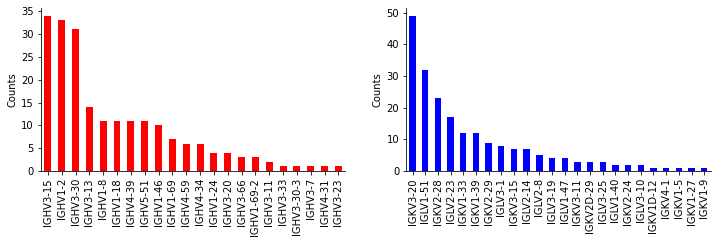

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
for df, axis, color in zip([catnap_heavy, catnap_light], axes, ["red", "blue"]):
    df["v_call_top"].str.split("*").str.get(0).value_counts().plot(
        kind="bar", color=color, ax=axis
    )
    axis.set_ylabel("Counts")
    sns.despine()